## Установка своего датасета (размечен в roboflow с помощью фундаментальной модели DINO)

In [1]:
!gdown 1kTidl6_8mmSXuf2NGMHu8EpitTm7z2yq

Downloading...
From (original): https://drive.google.com/uc?id=1kTidl6_8mmSXuf2NGMHu8EpitTm7z2yq
From (redirected): https://drive.google.com/uc?id=1kTidl6_8mmSXuf2NGMHu8EpitTm7z2yq&confirm=t&uuid=4cb86579-c594-4ca0-a7a0-bd043ac926a1
To: /content/Ring detection.v3i.yolov8.zip
100% 33.5M/33.5M [00:03<00:00, 9.92MB/s]


In [2]:
!unzip "Ring detection.v3i.yolov8.zip" -d dataset

Archive:  Ring detection.v3i.yolov8.zip
  inflating: dataset/README.dataset.txt  
  inflating: dataset/README.roboflow.txt  
  inflating: dataset/data.yaml       
   creating: dataset/valid/
   creating: dataset/valid/images/
  inflating: dataset/valid/images/1-5ct-Pear-Hidden-Halo-Moissanite-4-Prong-Ring-1-819x1024_jpeg.rf.15ae177efc4211b43339a8e36d06106e.jpg  
  inflating: dataset/valid/images/11-37-blue-star-sapphire-mans-ring1-1-_jpg.rf.d06500e7013a5e5a3d4ec2097bb7a65d.jpg  
  inflating: dataset/valid/images/11-37-blue-star-sapphire-mans-ring2_1-1-_jpg.rf.27a56e4d2122e5ece7ccf087edd2f21b.jpg  
  inflating: dataset/valid/images/122063-2_900x_jpg.rf.b64960812ac7102811e22ff1ab40a754.jpg  
  inflating: dataset/valid/images/122177-1_580x-2x_jpg.rf.05ac867e95a586f76a959fc7533d54cf.jpg  
  inflating: dataset/valid/images/122864-1_580x-2x_jpg.rf.2e1b6b00a406d30989e056f830dffc43.jpg  
  inflating: dataset/valid/images/123350-15_580x-2x_jpg.rf.3014cfe60e9d56cc2b1b77a715bf2cf2.jpg  
  inflati

## Установка

In [3]:
!python -m pip install opencv-python

In [4]:
!python -m pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 42.4 MB/s eta 0:00:00


In [4]:
!python -c "import torch; print(torch.cuda.is_available())" # Проверка доступности CUDA

False


In [5]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
!pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu122

Looking in indexes: https://download.pytorch.org/whl/cu122


In [7]:
!python -c "import torch; print(torch.cuda.is_available())" # Проверка доступности CUDA

True


##Вход в Weights&Biases

In [11]:
!pip install wandb

In [12]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


##Обучение

In [8]:
!cat /content/dataset/data.yaml

path: /content/dataset
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Ring']

roboflow:
  workspace: iimm2024
  project: ring-detection-qv7w2
  version: 3
  license: MIT
  url: https://universe.roboflow.com/iimm2024/ring-detection-qv7w2/dataset/3

In [13]:
from ultralytics import YOLO
import os
model = YOLO("yolov8s.pt")

dataset_dir = "./dataset"
print(os.getcwd())
if os.getcwd()[os.getcwd().rfind("/")+1:] != dataset_dir[2:]:
  os.chdir(dataset_dir)
model.train(data="data.yaml", batch=16, epochs=50)


/content/dataset
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

wandb: Currently logged in as: nicolaymoiseev1 (nicolaymoiseev1-hse-university). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 312MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<00:00, 1591.33it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 777.27it/s]


val: New cache created: /content/dataset/valid/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.07G     0.9462      2.018      1.343         13        640: 100%|██████████| 43/43 [00:17<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        145        173      0.415      0.445      0.352      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.07G      1.139      1.336      1.443         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        145        173      0.235      0.561      0.192     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.06G      1.241       1.33      1.539         15        640: 100%|██████████| 43/43 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        145        173      0.112      0.237     0.0918      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.02G      1.282       1.34      1.546         21        640: 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        145        173      0.302      0.439      0.279      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.03G      1.186      1.179      1.459         19        640: 100%|██████████| 43/43 [00:13<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        145        173      0.199       0.48      0.218     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.06G      1.161      1.204      1.471          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        145        173      0.833      0.692      0.757      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.84G      1.096       1.08      1.407         13        640: 100%|██████████| 43/43 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        145        173      0.689       0.63      0.665      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.89G      1.097      1.071      1.426         15        640: 100%|██████████| 43/43 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        145        173      0.551      0.647      0.606      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.03G      1.049       1.05      1.369         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        145        173      0.865      0.739      0.846      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.05G      1.027     0.9816       1.36         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        145        173      0.816      0.728      0.833      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.02G      1.016     0.9417      1.352         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        145        173      0.835      0.809      0.879      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.02G     0.9593     0.9036      1.312         22        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        145        173      0.853      0.775      0.848      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.01G     0.9429     0.8998      1.299         20        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        145        173      0.816      0.741      0.838       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.07G     0.9054     0.8351      1.273         28        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        145        173      0.848      0.821      0.876      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         4G     0.8949     0.8034      1.265         15        640: 100%|██████████| 43/43 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        145        173       0.89      0.809       0.92      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.02G     0.8793     0.8091      1.247         21        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        145        173      0.826      0.851      0.906      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.03G      0.853     0.7745      1.234         12        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        145        173       0.87      0.851      0.925      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.04G     0.8988     0.7865      1.264         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        145        173      0.909      0.807      0.914      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.86G     0.8853     0.7642      1.231         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        145        173      0.898      0.763      0.899      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.03G     0.8169     0.7121      1.206         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        145        173      0.888      0.871      0.932      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.03G      0.821     0.7267      1.218         16        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        145        173      0.899       0.78      0.899       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.05G     0.8023     0.6999      1.208         17        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        145        173      0.828      0.879      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.84G     0.7771     0.6812      1.195         22        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        145        173       0.94      0.861      0.941      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.87G     0.7902     0.6796       1.19         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        145        173      0.881      0.844      0.928      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.03G     0.7998     0.6756      1.187         11        640: 100%|██████████| 43/43 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        145        173       0.92      0.867      0.948      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.89G     0.7744     0.6532       1.17         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        145        173      0.957      0.894      0.954      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         4G     0.7687     0.6446      1.179         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        145        173      0.907      0.896      0.944      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.86G     0.7691     0.6042      1.184         18        640: 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        145        173      0.927      0.867      0.941      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G     0.7717     0.6182       1.16         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        145        173      0.884      0.884       0.93      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.05G     0.7471     0.6062      1.156         13        640: 100%|██████████| 43/43 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        145        173      0.911      0.902       0.95      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         4G     0.7214     0.5747      1.141         10        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        145        173      0.902      0.855       0.93      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.04G     0.7339     0.5823      1.143         14        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        145        173      0.852      0.919       0.95      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.03G     0.7051     0.5765      1.137         14        640: 100%|██████████| 43/43 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        145        173      0.919       0.85      0.931      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.06G     0.6876     0.5456      1.135         12        640: 100%|██████████| 43/43 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        145        173       0.91       0.88      0.951      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         4G     0.6576     0.5348       1.11         19        640: 100%|██████████| 43/43 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        145        173       0.92      0.867      0.955      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.02G     0.6567     0.5512      1.114         14        640: 100%|██████████| 43/43 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        145        173        0.9      0.941      0.952      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.01G     0.6715      0.534      1.114          7        640: 100%|██████████| 43/43 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        145        173      0.914      0.918      0.955      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.07G     0.6601      0.531      1.107         19        640: 100%|██████████| 43/43 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        145        173      0.946      0.913      0.966       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         4G     0.6509     0.5184      1.093         19        640: 100%|██████████| 43/43 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        145        173      0.945      0.897       0.96      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.05G     0.6597     0.5071      1.094         16        640: 100%|██████████| 43/43 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        145        173      0.927      0.919      0.964      0.865


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.03G      0.506      0.405     0.9887          6        640: 100%|██████████| 43/43 [00:15<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        145        173      0.929      0.931      0.965      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.06G     0.5003     0.3704     0.9735          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        145        173      0.895      0.896      0.933      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.84G     0.4737     0.3388     0.9558          7        640: 100%|██████████| 43/43 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        145        173      0.903      0.913      0.959       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.02G     0.4797     0.3447     0.9708          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        145        173      0.865      0.924      0.952      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.02G     0.4772     0.3325     0.9689          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        145        173      0.889      0.921       0.95      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.06G     0.4648     0.3244     0.9459         10        640: 100%|██████████| 43/43 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        145        173      0.927      0.908      0.945      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.84G      0.446     0.3152     0.9383          9        640: 100%|██████████| 43/43 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.928      0.891      0.954      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.86G     0.4355     0.3023     0.9281          6        640: 100%|██████████| 43/43 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        145        173      0.945      0.893      0.959      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.03G     0.4259     0.2973     0.9209          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        145        173      0.945      0.884      0.952      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.06G     0.4319     0.2977     0.9298          8        640: 100%|██████████| 43/43 [00:13<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        145        173       0.94      0.896      0.947      0.867



50 epochs completed in 0.247 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


                   all        145        173      0.945      0.893      0.959      0.873
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/detect/train3


lr/pg0,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▃▂▁▂▂▆▅▇▇▇▇▇███▇█▇██████████████████████
metrics/mAP50-95(B),▂▂▁▂▂▅▄▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇█▇▇██████████████
metrics/precision(B),▄▂▁▃▂▆▅▇▇▇▇▇▇▇▇█▇█▇██████▇████████▇▇████
metrics/recall(B),▃▄▁▃▃▅▅▆▆▇▆▇▇▇▇▆▇▆▇▇██▇█▇▇▇▇████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▇██▇▆▆▆▆▆▅▅▅▅▄▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af25c26f190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Небольшая проверка того, что случится при обучении обученной модели такими же данными, но с другим batch и количеством эпох

In [14]:
model.train(data="data.yaml", batch=32, epochs=25)

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /content/dataset/train/labels.cache... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      7.45G     0.5791     0.4721      1.069         11        640: 100%|██████████| 22/22 [00:15<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all        145        173      0.939      0.883      0.946      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      7.27G     0.6517     0.5203      1.092         13        640: 100%|██████████| 22/22 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        145        173      0.896      0.913      0.926       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      7.26G      0.701     0.5757      1.134         19        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        145        173      0.884      0.881      0.938      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      7.26G     0.6967     0.5603      1.118         16        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        145        173      0.853      0.751      0.849      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      7.26G     0.7534     0.6204       1.16         15        640: 100%|██████████| 22/22 [00:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        145        173      0.898      0.884      0.938      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      7.57G       0.74     0.6014      1.153         15        640: 100%|██████████| 22/22 [00:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all        145        173      0.947      0.822      0.912      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      7.57G     0.7737     0.6652      1.193         15        640: 100%|██████████| 22/22 [00:14<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all        145        173      0.899      0.823      0.898      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.57G     0.7592     0.6291      1.152         14        640: 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        145        173      0.823      0.832      0.885      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      7.26G     0.7601     0.6058      1.155         22        640: 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all        145        173      0.866      0.856       0.91      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      7.57G     0.7349      0.593      1.155         15        640: 100%|██████████| 22/22 [00:14<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        145        173      0.891      0.853      0.898      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.57G     0.7187     0.5658      1.146         23        640: 100%|██████████| 22/22 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all        145        173      0.822      0.867      0.894      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      7.26G     0.7071     0.5598      1.119         19        640: 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all        145        173      0.892      0.925      0.937      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      7.57G     0.7084     0.5682      1.125         13        640: 100%|██████████| 22/22 [00:15<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        145        173      0.907       0.79      0.902      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      7.57G     0.6904     0.5541      1.117         16        640: 100%|██████████| 22/22 [00:15<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        145        173      0.893       0.89       0.94      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      7.26G     0.6706     0.5156      1.118         12        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all        145        173      0.881      0.897      0.931      0.816


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      7.57G     0.5461     0.4212      1.028          8        640: 100%|██████████| 22/22 [00:18<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        145        173      0.893      0.867       0.93       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      7.57G     0.5271     0.3906     0.9989          6        640: 100%|██████████| 22/22 [00:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all        145        173      0.889      0.879      0.922      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      7.26G     0.5292     0.3584      0.985          6        640: 100%|██████████| 22/22 [00:14<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        145        173       0.92      0.866      0.933      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      7.57G     0.4925     0.3428     0.9824          9        640: 100%|██████████| 22/22 [00:12<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        145        173      0.926      0.879      0.937      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      7.57G     0.4602     0.3309     0.9456         11        640: 100%|██████████| 22/22 [00:12<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all        145        173      0.905      0.879      0.936      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      7.26G     0.4492     0.3085     0.9482          7        640: 100%|██████████| 22/22 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all        145        173      0.905       0.88      0.931      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      7.57G     0.4428     0.3085     0.9362          7        640: 100%|██████████| 22/22 [00:15<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all        145        173      0.935      0.884      0.949      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      7.57G     0.4331     0.2903     0.9283          6        640: 100%|██████████| 22/22 [00:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]

                   all        145        173      0.902      0.925      0.937      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      7.26G     0.4203      0.279     0.9207          6        640: 100%|██████████| 22/22 [00:15<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        145        173      0.916      0.913      0.943       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      7.57G     0.4113     0.2715     0.9222          7        640: 100%|██████████| 22/22 [00:15<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all        145        173      0.913      0.908      0.945      0.875



25 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train32/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train32/weights/best.pt, 22.5MB

Validating runs/detect/train32/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


                   all        145        173      0.913      0.909      0.945      0.875
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train32


lr/pg0,▂▄▆▇██▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg1,▂▄▆▇██▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg2,▂▄▆▇██▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁
metrics/mAP50(B),█▆▇▁▇▅▄▃▅▄▄▇▅▇▇▇▆▇▇▇▇█▇██
metrics/mAP50-95(B),▇▆▄▁▄▃▂▁▃▄▃▅▃▆▆▅▅▆▇▆▇█▇██
metrics/precision(B),█▅▄▃▅█▅▁▃▅▁▅▆▅▄▅▅▇▇▆▆▇▅▆▆
metrics/recall(B),▆█▆▁▆▄▄▄▅▅▆█▃▇▇▆▆▆▆▆▆▆██▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▄▆▇▇█▇███▇▇▇▇▆▆▄▃▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af29df0e4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Легко увидеть различия между графиками обученной с нуля и переобученной модели

Обученная с нуля
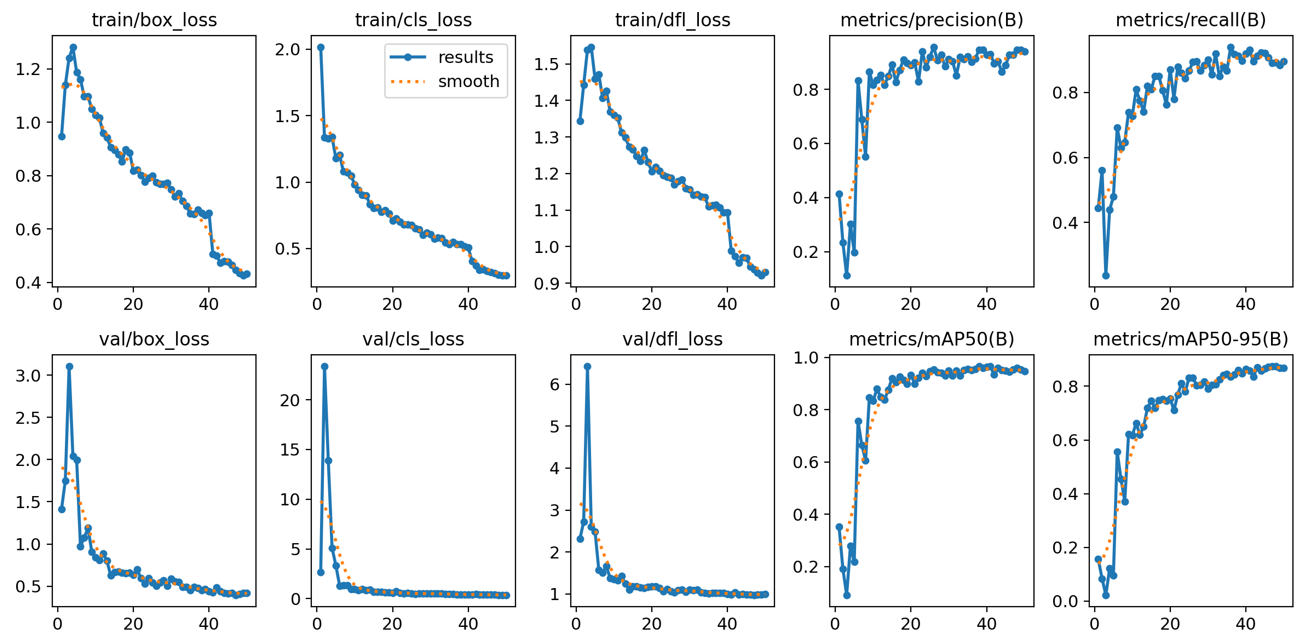

Переобученная модель
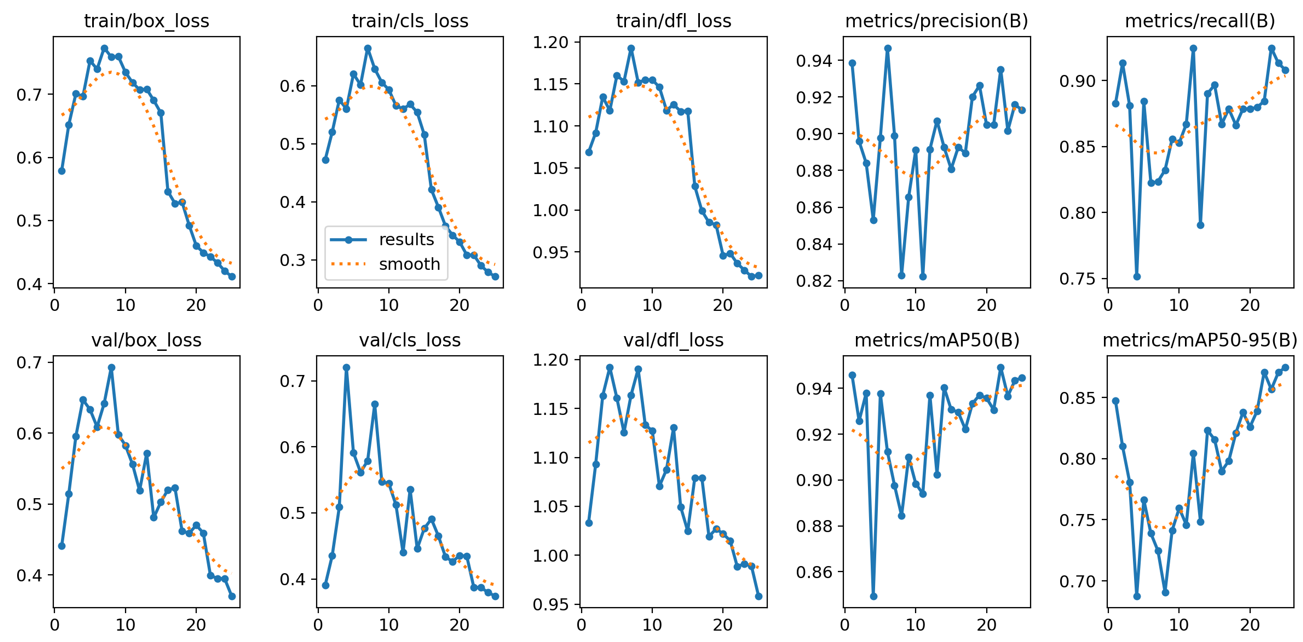

In [15]:
model = YOLO("yolov8s.pt")
model.train(data="data.yaml", batch=32, epochs=50)

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /content/dataset/train/labels.cache... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.78G     0.9711      2.606      1.362         11        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        145        173      0.699      0.728      0.716       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.63G      1.039      1.285      1.371         13        640: 100%|██████████| 22/22 [00:17<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all        145        173      0.253      0.295      0.167     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.61G      1.095      1.232      1.425         19        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all        145        173     0.0107      0.052    0.00248   0.000824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.61G      1.073      1.147      1.388         16        640: 100%|██████████| 22/22 [00:16<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]

                   all        145        173     0.0349      0.179     0.0222    0.00534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.61G      1.139      1.128      1.431         15        640: 100%|██████████| 22/22 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

                   all        145        173      0.615      0.532      0.559      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.61G       1.09      1.102      1.399         15        640: 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all        145        173      0.349      0.289      0.227      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.61G      1.132      1.084      1.436         15        640: 100%|██████████| 22/22 [00:14<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all        145        173      0.245     0.0462     0.0549     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.61G       1.06      1.036      1.369         14        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        145        173      0.171      0.281      0.152     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.61G      1.043       1.01      1.349         22        640: 100%|██████████| 22/22 [00:17<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        145        173      0.382      0.283      0.266      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.61G      1.026     0.9653      1.349         15        640: 100%|██████████| 22/22 [00:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all        145        173      0.665      0.677      0.738      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.61G     0.9772     0.9049      1.331         23        640: 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all        145        173      0.521      0.613      0.538      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.61G     0.9707     0.9108      1.311         19        640: 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all        145        173      0.776      0.647      0.754      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.61G     0.9087     0.8562      1.264         13        640: 100%|██████████| 22/22 [00:14<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        145        173      0.428      0.533      0.431      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.61G      0.934     0.8433       1.29         16        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        145        173      0.756       0.78      0.829      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.61G     0.8716     0.7834      1.248         12        640: 100%|██████████| 22/22 [00:16<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        145        173      0.482       0.58      0.548       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.61G     0.8864     0.8031      1.255         17        640: 100%|██████████| 22/22 [00:14<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all        145        173      0.928      0.775      0.879      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.61G     0.8511     0.7823      1.216          7        640: 100%|██████████| 22/22 [00:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        145        173      0.833      0.827      0.885      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.61G     0.8808     0.7729      1.244         13        640: 100%|██████████| 22/22 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all        145        173      0.751      0.646       0.72      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.61G      0.856     0.7511       1.23         13        640: 100%|██████████| 22/22 [00:15<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        145        173      0.764      0.705      0.754      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.61G     0.8379     0.7189      1.219         10        640: 100%|██████████| 22/22 [00:15<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all        145        173       0.84      0.822      0.894      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.66G     0.8096     0.6852      1.204         13        640: 100%|██████████| 22/22 [00:17<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all        145        173      0.911       0.85      0.926      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.61G     0.8418     0.7202      1.238         18        640: 100%|██████████| 22/22 [00:14<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        145        173      0.777      0.786      0.874      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.61G     0.8037      0.694      1.186         12        640: 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        145        173      0.854       0.85       0.91      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.61G     0.7773     0.6586      1.189         16        640: 100%|██████████| 22/22 [00:13<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        145        173       0.89      0.861      0.932      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.61G     0.7424     0.6156      1.158         15        640: 100%|██████████| 22/22 [00:16<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]

                   all        145        173      0.911      0.888      0.951      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.61G     0.7581     0.6219       1.17         20        640: 100%|██████████| 22/22 [00:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        145        173      0.903       0.78      0.912      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.61G     0.7411     0.6178      1.149         15        640: 100%|██████████| 22/22 [00:15<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        145        173      0.856      0.855      0.922      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.61G      0.715     0.5853       1.14         16        640: 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        145        173      0.948       0.84      0.933      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.61G     0.6978     0.5702       1.13         12        640: 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all        145        173      0.894      0.913      0.958      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.61G     0.6923     0.5762      1.127         22        640: 100%|██████████| 22/22 [00:14<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        145        173      0.865      0.929      0.957      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.61G     0.7049     0.5586      1.118         19        640: 100%|██████████| 22/22 [00:16<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all        145        173      0.955      0.854      0.939      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.65G     0.6814     0.5335      1.117         17        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all        145        173      0.927      0.882      0.955      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.65G     0.7053     0.5694      1.155          7        640: 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all        145        173      0.918      0.905      0.944       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.61G     0.6675     0.5233      1.105         15        640: 100%|██████████| 22/22 [00:12<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all        145        173      0.912        0.9      0.948      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.61G     0.6378     0.5021      1.086         20        640: 100%|██████████| 22/22 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        145        173      0.915      0.896      0.957      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.61G      0.656      0.503        1.1         18        640: 100%|██████████| 22/22 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all        145        173       0.91      0.919      0.959      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.61G     0.6314     0.4938      1.095         13        640: 100%|██████████| 22/22 [00:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        145        173      0.926      0.934      0.971       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.61G     0.6388      0.492      1.101         17        640: 100%|██████████| 22/22 [00:14<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        145        173      0.919      0.942       0.97      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.61G     0.6517     0.4979      1.098         18        640: 100%|██████████| 22/22 [00:13<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all        145        173      0.949      0.902      0.957      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.61G     0.6118     0.4668      1.078         14        640: 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]

                   all        145        173      0.923      0.903      0.952       0.85


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.61G     0.5079     0.3788     0.9986          6        640: 100%|██████████| 22/22 [00:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        145        173      0.968      0.882      0.957      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.61G      0.471     0.3244     0.9553          6        640: 100%|██████████| 22/22 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all        145        173       0.96      0.931      0.966      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.61G     0.4675     0.3276     0.9516          7        640: 100%|██████████| 22/22 [00:15<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all        145        173      0.935      0.911      0.953      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.61G     0.4651     0.3248     0.9599          6        640: 100%|██████████| 22/22 [00:15<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        145        173      0.952      0.925      0.961      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.61G     0.4373     0.3142       0.94          8        640: 100%|██████████| 22/22 [00:12<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        145        173      0.913      0.931      0.961      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.61G     0.4403       0.31     0.9259         10        640: 100%|██████████| 22/22 [00:12<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all        145        173      0.927      0.919      0.958      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.61G     0.4209     0.2931     0.9171          9        640: 100%|██████████| 22/22 [00:14<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all        145        173      0.918      0.936      0.962      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.61G     0.4186     0.2955     0.9271          6        640: 100%|██████████| 22/22 [00:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        145        173      0.899      0.923      0.958      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.61G     0.4056     0.2937     0.9271          8        640: 100%|██████████| 22/22 [00:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all        145        173      0.935      0.911      0.957      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.61G      0.412     0.2845     0.9285          8        640: 100%|██████████| 22/22 [00:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        145        173      0.921      0.925      0.964      0.889



50 epochs completed in 0.265 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 22.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


                   all        145        173      0.921      0.925      0.964      0.888
Speed: 0.2ms preprocess, 5.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train4


lr/pg0,▂▄▆▇██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▄▆▇██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▄▇██▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▆▂▁▅▃▃▆▅▆▄▅▇▇▆▆█▇███████████████████████
metrics/mAP50-95(B),▅▁▁▁▃▁▂▂▅▃▃▆▄▇▇▅▇▇▆▇▇▇▇██▇██████████████
metrics/precision(B),▆▃▁▁▅▃▂▄▆▅▄▆▄█▇▇▇█▇▇▇█▇▇██████████████▇█
metrics/recall(B),▆▁▂▅▃▃▃▆▅▆▇▅▇▇▆▇▇▇▇▇▇▇▇█████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▇█▇██▇▇▇▆▆▆▅▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af25d24a440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
model = YOLO("yolov8m.pt")
model.train(data="data.yaml", batch=16, epochs=50)

100%|██████████| 49.7M/49.7M [00:00<00:00, 356MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /content/dataset/train/labels.cache... 678 images, 0 backgrounds, 0 corrupt: 100%|██████████| 678/678 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.96G      1.028      1.743      1.425         13        640: 100%|██████████| 43/43 [00:29<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        145        173      0.347      0.497       0.29      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       6.9G      1.327      1.528      1.624         11        640: 100%|██████████| 43/43 [00:26<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        145        173     0.0071      0.156    0.00219   0.000426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.89G      1.367      1.515      1.669         15        640: 100%|██████████| 43/43 [00:26<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        145        173     0.0358      0.358     0.0204    0.00407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.87G      1.367       1.48       1.63         21        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        145        173      0.227      0.364      0.157     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.86G      1.324      1.324      1.586         19        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        145        173      0.115      0.428     0.0771     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.88G      1.245      1.285      1.545          6        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        145        173      0.562      0.467      0.495       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.81G      1.146      1.163      1.464         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        145        173      0.636      0.618      0.616      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.88G      1.168      1.134      1.475         15        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        145        173      0.849      0.711       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.87G      1.086      1.086      1.415         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        145        173      0.717      0.659      0.728      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.86G      1.096      1.032       1.42         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        145        173      0.765      0.751      0.799      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.81G      1.108      1.006      1.429         14        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.781      0.763      0.829      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.85G      1.062     0.9845      1.393         22        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        145        173      0.812      0.776      0.856      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.87G      1.024     0.9741      1.365         20        640: 100%|██████████| 43/43 [00:26<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        145        173      0.909      0.749      0.857      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.88G     0.9855     0.9227       1.33         28        640: 100%|██████████| 43/43 [00:25<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        145        173      0.879      0.798      0.892      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.81G     0.9908     0.8963       1.34         15        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        145        173      0.865      0.798      0.871      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.86G     0.9504     0.8949      1.327         21        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        145        173       0.76      0.809      0.841      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.87G     0.9012     0.8117      1.272         12        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        145        173      0.928      0.819      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.88G     0.9475     0.8515      1.322         11        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        145        173      0.939       0.78      0.893      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.81G     0.9508     0.8702      1.298         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        145        173      0.733      0.694      0.774      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.86G     0.8813     0.7834      1.268         11        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        145        173      0.921      0.807      0.908      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.88G     0.8732     0.8183      1.263         16        640: 100%|██████████| 43/43 [00:24<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        145        173      0.895      0.832      0.917       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.87G     0.8382     0.7572      1.242         17        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        145        173      0.919      0.786      0.914      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.82G     0.8321     0.7245      1.244         22        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        145        173      0.902      0.847       0.91      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.86G     0.8079     0.7285      1.207         11        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        145        173       0.92      0.794      0.907      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.86G     0.8187     0.7436      1.214         11        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        145        173      0.885      0.792      0.904       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.87G      0.813     0.7102      1.217         14        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        145        173      0.952      0.796      0.915      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.82G     0.8099     0.7128      1.222         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        145        173      0.876      0.855      0.927      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.87G     0.7928     0.6926      1.204         18        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        145        173      0.927       0.85       0.93      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.86G     0.8117     0.6855      1.199         14        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        145        173      0.939      0.809      0.932      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.86G     0.7881     0.6754      1.196         13        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        145        173      0.929      0.844      0.931      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       6.8G     0.7698     0.6433      1.185         10        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        145        173      0.954      0.832      0.924      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.88G     0.7776     0.6425      1.187         14        640: 100%|██████████| 43/43 [00:25<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        145        173      0.967      0.809       0.94      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.86G     0.7526     0.6274      1.176         14        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        145        173      0.919      0.879      0.935      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.88G     0.7385     0.6184      1.178         12        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        145        173      0.865      0.888      0.928      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.76G     0.7068     0.6107      1.157         19        640: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        145        173      0.916      0.838      0.918      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.86G     0.6946      0.595      1.153         14        640: 100%|██████████| 43/43 [00:24<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        145        173      0.916      0.883      0.939      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.86G     0.6971     0.5865      1.138          7        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        145        173      0.914      0.884      0.946      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.89G     0.6997     0.5703      1.149         19        640: 100%|██████████| 43/43 [00:25<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        145        173      0.936      0.832      0.935      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.81G     0.6887     0.5637      1.131         19        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.911      0.913      0.942      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.88G     0.6861     0.5565      1.127         16        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        145        173      0.944      0.861      0.939      0.821


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.87G     0.5483     0.4447      1.037          6        640: 100%|██████████| 43/43 [00:25<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.899      0.874       0.93      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.87G     0.5375     0.4182      1.021          6        640: 100%|██████████| 43/43 [00:24<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        145        173      0.941       0.89      0.945      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       6.8G     0.5179     0.3953      1.002          7        640: 100%|██████████| 43/43 [00:25<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.928       0.89      0.938      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.86G     0.5153     0.3846      1.008          6        640: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        145        173      0.949      0.869       0.94      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G     0.5115     0.3801      1.014          8        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        145        173      0.945      0.873       0.94      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.86G     0.4855     0.3566      0.972         10        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        145        173       0.91      0.877      0.934      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       6.8G     0.4677      0.351     0.9648          9        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        145        173      0.968      0.871      0.952      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.85G     0.4767     0.3396     0.9688          6        640: 100%|██████████| 43/43 [00:25<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        145        173      0.942      0.855      0.939      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G     0.4531     0.3258     0.9481          8        640: 100%|██████████| 43/43 [00:25<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        145        173      0.945      0.861      0.944      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.87G     0.4437     0.3236     0.9537          8        640: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        145        173      0.961      0.858      0.941      0.846



50 epochs completed in 0.475 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 52.0MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


                   all        145        173      0.968      0.871      0.952      0.851
Speed: 0.3ms preprocess, 10.9ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train5


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▃▁▂▂▅▇▆▇▇▇█▇▇███████████████████████████
metrics/mAP50-95(B),▂▁▁▁▁▄▅▅▆▆▆▇▇▆▇▆▇▇▇▇▇▇█▇█▇█▇▇▇██████████
metrics/precision(B),▃▁▁▃▂▆▇▆▇▇█▇▇▆█▆▇████▇████▇█████▇███████
metrics/recall(B),▄▁▃▃▄▅▆▆▇▇▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇██▇▇███████▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅████▆▆▆▆▆▅▅▅▅▄▅▄▄▄▄▄▄▄▄▄▃▄▃▃▃▃▃▃▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af25c6c8790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

##Проверка


image 1/1 /content/test_ring.png: 352x640 1 Ring, 17.3ms
Speed: 2.9ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)


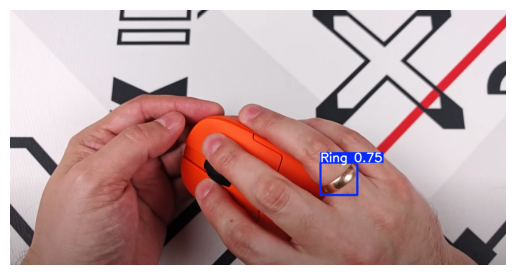

In [23]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
model_path = "/runs/detect/train3/weights/best.pt"
dataset_dir = "/content/dataset" # путь к папке с вашим датасетом
model = YOLO(dataset_dir + model_path) # берём модель размера nano
results = model.predict("/content/test_ring.png")
result = results[0]
res_plotted = result.plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/test_ring.png: 352x640 1 Ring, 11.6ms
Speed: 3.0ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


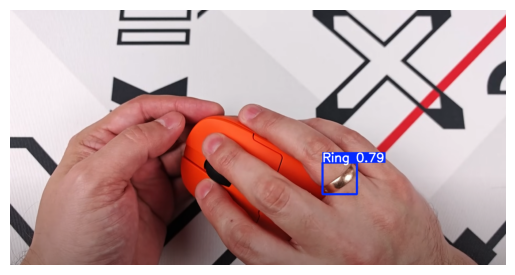

In [24]:
model_path = "/runs/detect/train4/weights/best.pt"
dataset_dir = "/content/dataset" # путь к папке с вашим датасетом
model = YOLO(dataset_dir + model_path) # берём модель размера nano
results = model.predict("/content/test_ring.png")
result = results[0]
res_plotted = result.plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/test_ring.png: 352x640 1 Ring, 25.6ms
Speed: 3.3ms preprocess, 25.6ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


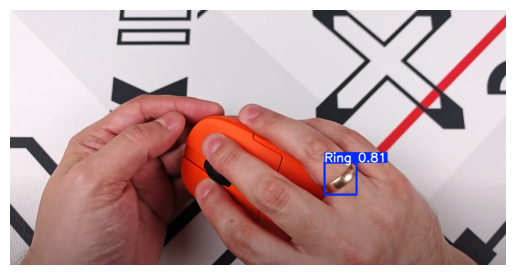

In [25]:
model_path = "/runs/detect/train5/weights/best.pt"
dataset_dir = "/content/dataset" # путь к папке с вашим датасетом
model = YOLO(dataset_dir + model_path) # берём модель размера nano
results = model.predict("/content/test_ring.png")
result = results[0]
res_plotted = result.plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/photo_2024-10-20_17-00-57.jpg: 640x480 1 Ring, 38.1ms
Speed: 2.5ms preprocess, 38.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


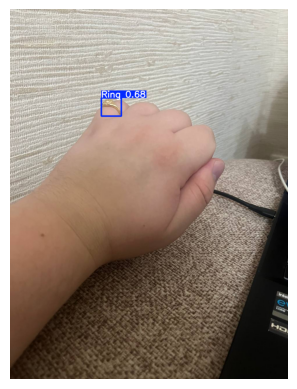

In [29]:
model_path = "/runs/detect/train5/weights/best.pt"
dataset_dir = "/content/dataset" # путь к папке с вашим датасетом
model = YOLO(dataset_dir + model_path) # берём модель размера nano
results = model.predict("/content/photo_2024-10-20_17-00-57.jpg")
result = results[0]
res_plotted = result.plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Скачиваем результаты

In [33]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [34]:
!tar -zcvf /content/result.tar.gz /content/dataset

tar: Removing leading `/' from member names
/content/dataset/
/content/dataset/yolov8s.pt
/content/dataset/README.dataset.txt
/content/dataset/valid/
/content/dataset/valid/images/
/content/dataset/valid/images/39939_jpg.rf.0da5fa5c5f6683f0083dbf0e9c966dff.jpg
/content/dataset/valid/images/sq-7adc7ac4e7b949e9bcd6082dacce469c-78195a50db4f487c92789e44_jpg.rf.b64b684799706bc692f3a348685859b5.jpg
/content/dataset/valid/images/7d10a5c9c1da6dcecde048bcb964c10e_jpg.rf.5316285ab38e39d1ad6fbc6323e54a5d.jpg
/content/dataset/valid/images/remodelling-project-1920w_jpg.rf.935935f4dc11f03858d09506f41cefe4.jpg
/content/dataset/valid/images/RINGTRINITYSTACKSIDEVIEW_jpg.rf.3e02dd2fced15477552b9e46a2c01ef8.jpg
/content/dataset/valid/images/Frenelle-Jewellery-Ring-Ainsley-Gold-7_SNH5VTJMSVG9_21d9f8_jpg.rf.a3b03a4f445e8465a60d6531fa1b0136.jpg
/content/dataset/valid/images/9_jpg_jpg.rf.48005547beb126de20b0b0a223561598.jpg
/content/dataset/valid/images/ScreenShot2021-06-25at1-58-59JPEG-c61470afa5dd42899d2f6

## Трекер экспериментов

В трекере получаем такие графики

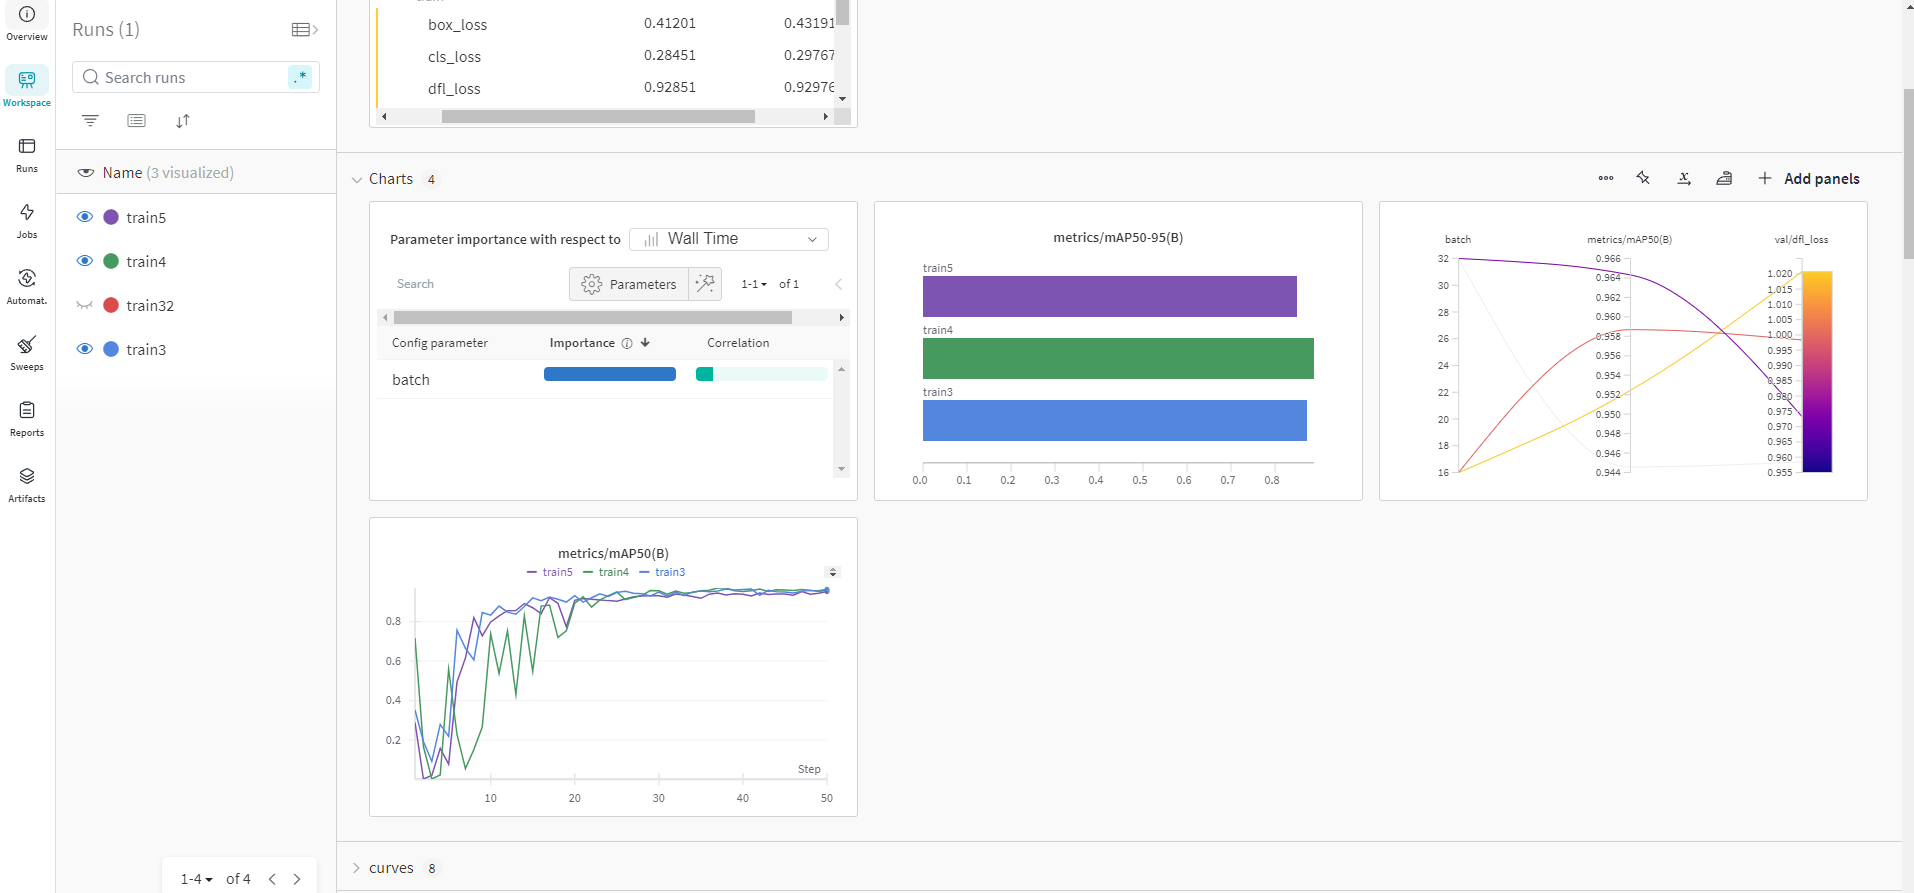

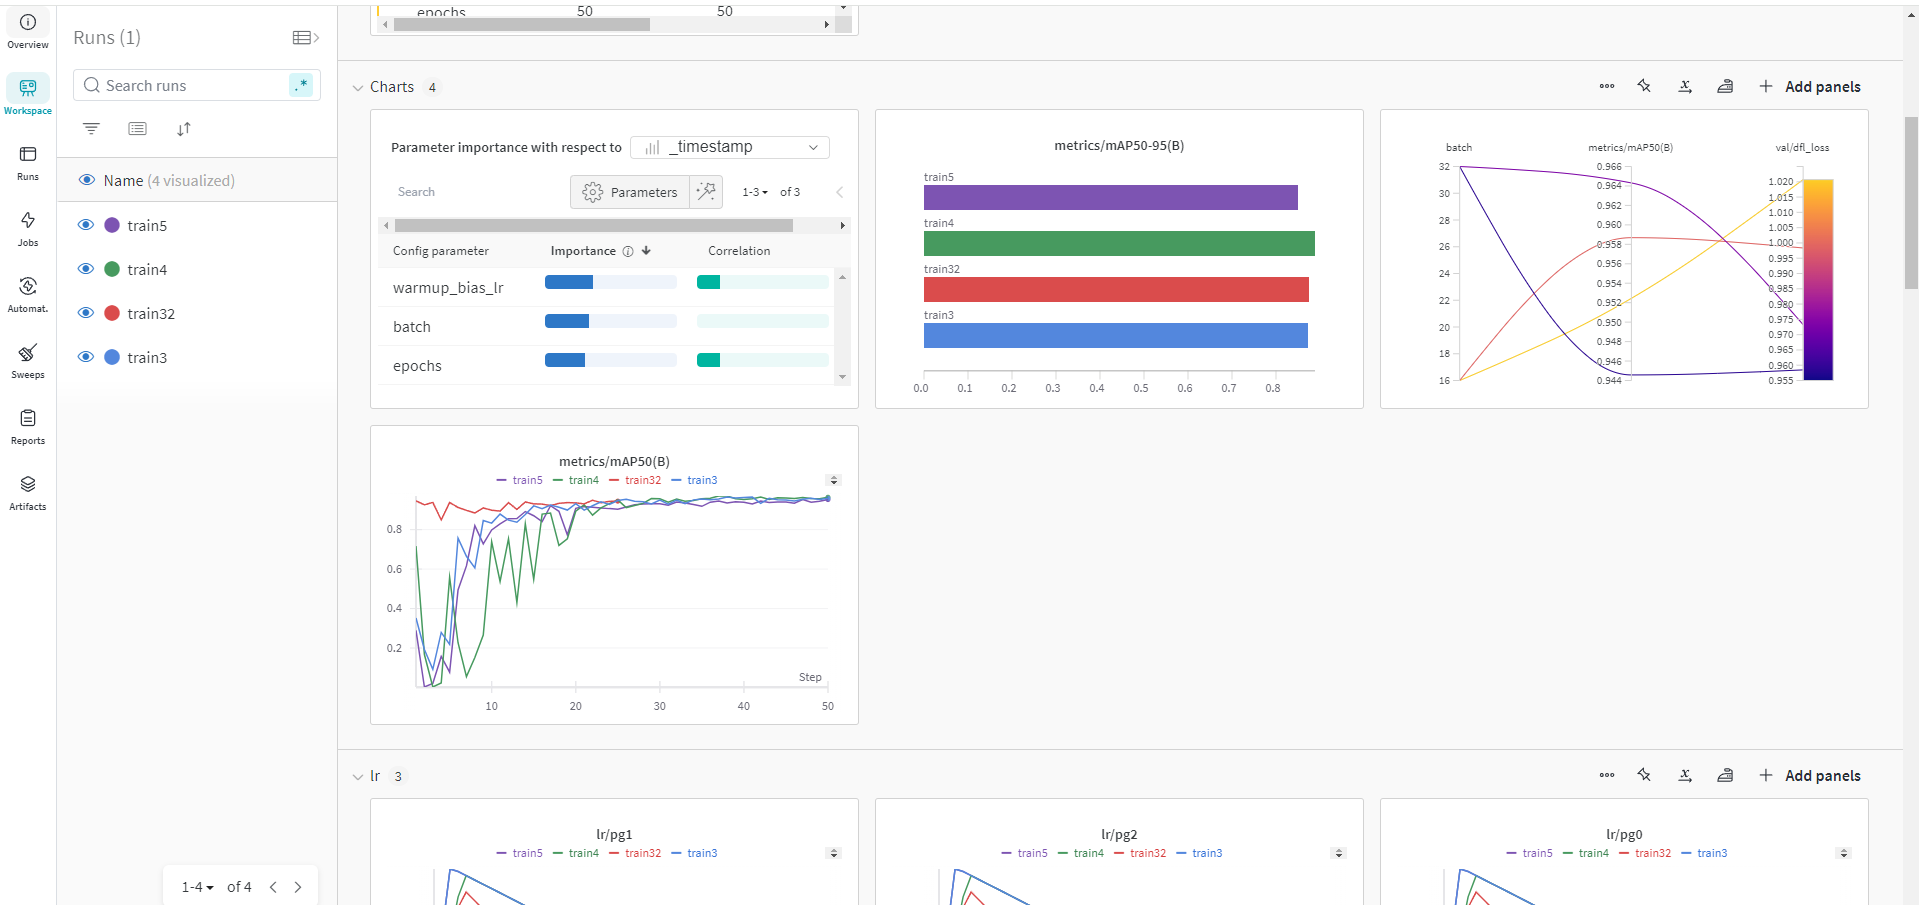